**Daniel Buguks and Srayan Gangopadhyay**  
*18 June 2020*

# Y1 Project: A framework to visualise charged particle trajectories in electric and magnetic fields

## Demonstration notebook

*Work in progress. For now, run this cell and see the magic:*

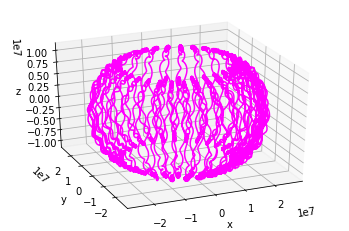


 Parameter            Value
-------------  -----------
Max. distance  2.90508e+07
Avg. distance  2.37025e+07
Max. speed     4.3909e+07
Avg. speed     4.34861e+07


In [1]:
import y1project as pj
import numpy as np

# PARAMETERS
r0 = [2.6e7,0, 0]  # initial position
v0 = [0, 2.2e7, 3.8e7]  # initial velocity
q = pj.e  # charge
m = pj.m_pr  # mass
h = 0.002  # step size
end = 100  # t-value to stop integration
size = [np.inf, np.inf, np.inf]  # simulation dimensions

def B_field(r):
    """Returns the components of the magnetic
    field, given a 3D position vector."""
    # EARTH'S DIPOLE FIELD
    x, y, z = r[0], r[1], r[2]
    B0 = 3.1e-5
    Re = 6.4e6
    scale =  (-B0 * Re**3) / np.linalg.norm(r)**5
    return [scale*3*x*z, scale*3*y*z, scale*(2*z*z -x*x- y*y)]

def E_field(r):
    """Returns the components of the electric
    field, given a 3D position vector."""
    return [0,0,0]

r, v = pj.rk4(pj.lorentz, r0, v0, h, end, E_field, B_field, q, m, size)
pj.plot_or_anim(r, int((end/h)/100), *pj.plotsetup(r), anim=False)
pj.printout(r, v)
# pj.textout(r, v)